In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [168]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [169]:
import warnings
warnings.filterwarnings('ignore')

## Reading and viewing data

In [170]:
df=pd.read_csv('covid21.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,IND,Asia,India,1/30/2020,1,1,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
1,IND,Asia,India,1/31/2020,1,0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
2,IND,Asia,India,2/1/2020,1,0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
3,IND,Asia,India,2/2/2020,2,1,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
4,IND,Asia,India,2/3/2020,3,1,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [172]:
df['date']=pd.to_datetime(df['date'])#,format='%m%d%d%y%y%y%y')
df['date'].dtype

dtype('<M8[ns]')

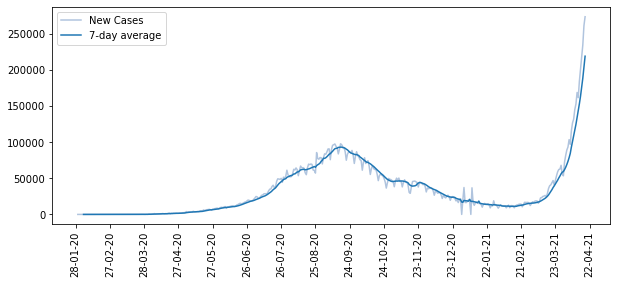

In [173]:
plt.figure(figsize=(10,4))

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))

ax.plot(df['date'],df['new_cases'],c='lightsteelblue')
plt.plot(df['date'],df['new_cases_smoothed'])

plt.xticks(rotation=90) 
plt.legend(['New Cases','7-day average'])
plt.show()

## Exploratory data analysis

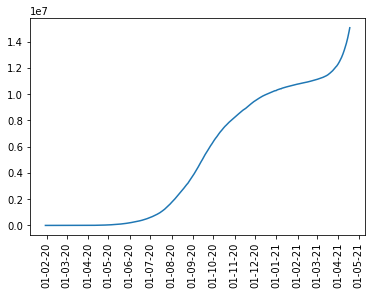

In [174]:
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))

plt.plot(df['date'],df['total_cases'])
plt.xticks(rotation=90) 

plt.show()

## Fitting statistical models

In [175]:
Y=df['total_cases'].values

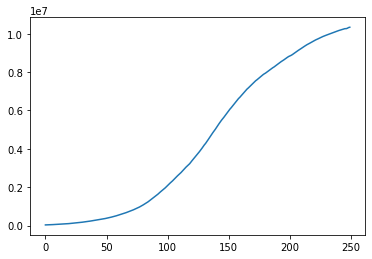

In [176]:
plt.plot(Y[90:340])

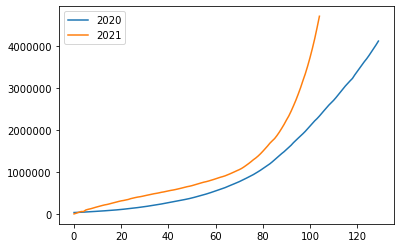

In [177]:
plt.plot(Y[90:220])
plt.plot(Y[340:]-Y[340])
plt.legend(['2020','2021'])

In [178]:
y=Y[90:340]

### Logistic Curve

In [179]:
def logistic(x, L ,x0, k):
    y = L / (1 + np.exp(-k*(x-x0)))
    return (y)

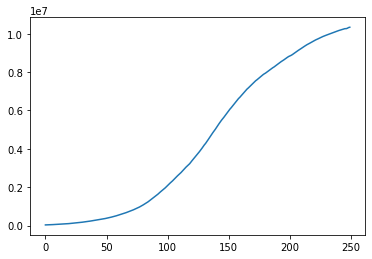

In [180]:
plt.plot(y)
plt.show()

In [181]:
x=np.array(range(len(y)))

p0 = [max(y), np.median(x),1] # Initial values

popt, pcov = curve_fit(logistic, x, y,p0)

In [182]:
params_logistic=list(popt)
y_logistic=logistic(x, *params_logistic)


Parameters: 10374744.020, 142.104, 0.033
R2 Score:  0.9991937859775777


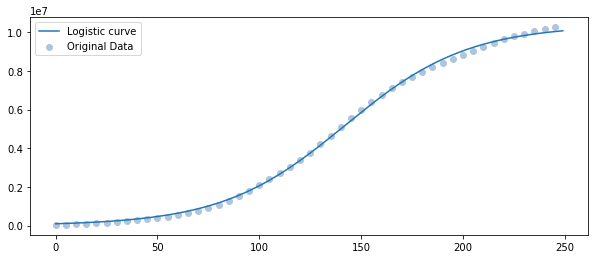

In [183]:
plt.figure(figsize=(10,4))
plt.scatter(x[::5],y[::5],label='Original Data', c='lightsteelblue')
plt.plot(x, y_logistic,label='Logistic curve')
plt.legend()

print('Parameters: {0:.3f}, {1:.3f}, {2:.3f}'.format((*popt)))
print('R2 Score: ',r2_score(y_logistic,y))

### Gompertz Function (General Form)

In [184]:
def gompertz(x, a,b,c):
    y = a*np.exp(-b*np.exp(-c*x))
    return (y)

In [185]:
p0 = [max(y), np.median(x),1] # initial guess

popt, pcov = curve_fit(gompertz, x, y,p0,maxfev=10000000)

print(*popt)

11680927.964158552 10.435969343379956 0.01817517469051282


In [186]:
params_gompertz=list(popt)
y_gompertz=gompertz(x, *params_gompertz)

Parameters: 11680927.964, 10.436, 0.018
R2 Score:  0.9990260404718984


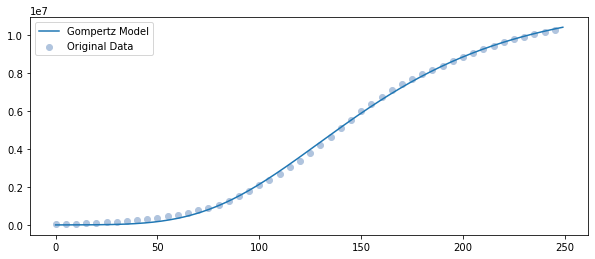

In [187]:
plt.figure(figsize=(10,4))
plt.scatter(x[::5],y[::5],label='Original Data', c='lightsteelblue')

# plt.plot(df['date'].values[90:340],y_gompertz,label='Gompertz Model')
plt.plot(y_gompertz,label='Gompertz Model')
plt.legend()

print('Parameters: {0:.3f}, {1:.3f}, {2:.3f}'.format((*params_gompertz)))
print('R2 Score: ',r2_score(y_gompertz,y))

### Gompertz Curve

In [215]:
def gompertz2(x,K, N0, a):
    Y = N0*np.exp(np.log(K/N0)*(1-np.exp(-a*x)))
    return (Y)

In [216]:
x=np.array(range(len(y)))

p0=[max(y),33000,0.0142]
p0=list(params_gompertz)
popt, pcov = curve_fit(gompertz2, x, y,p0,maxfev=10000000)

print(*popt)

11680920.165965535 342.90671370444414 0.01817520776245861


In [217]:
params_gompertz2=list(popt)
y_gompertz2=gompertz2(x, *params_gompertz2)

In [218]:
r2_score(y_gompertz2,y)

0.9990260409176372

Parameters: 11680920.166, 342.907, 0.018
R2 Score:  0.9990260409176372


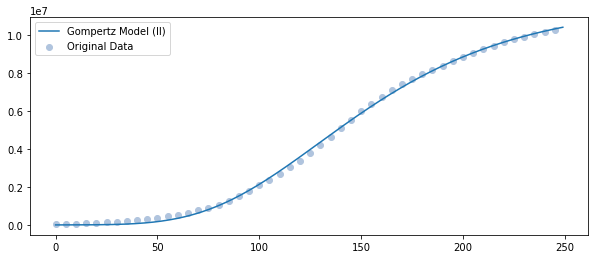

In [219]:
plt.figure(figsize=(10,4))
plt.scatter(x[::5],y[::5],label='Original Data', c='lightsteelblue')

# plt.plot(df['date'].values[90:340],y_gompertz,label='Gompertz Model')
plt.plot(y_gompertz2,label='Gompertz Model (II)')
plt.legend()

print('Parameters: {0:.3f}, {1:.3f}, {2:.3f}'.format((*params_gompertz2)))
print('R2 Score: ',r2_score(y_gompertz2,y))

### Richard Function

In [195]:
def richard(x, a,b,c,E):
    y = a/(1+E*np.exp(-b*(x-c)))**(1/E)
    return (y)

In [196]:
p0 = [max(y), 1,120,0.5]

lim=-1
popt, pcov = curve_fit(richard, x[:lim], y[:lim],p0)

print(*popt)

# x=np.array(range(300))

10831474.217574395 0.0255185547376226 136.6415699067018 0.49562399792513984


In [197]:
y_richard=richard(x, *popt)

0.9997533797801675


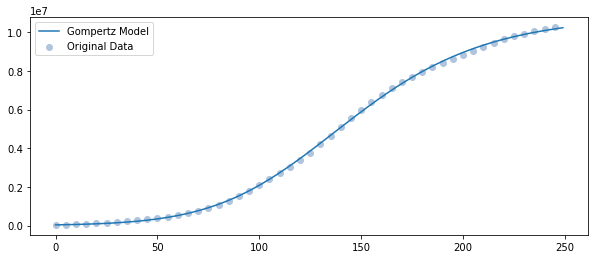

In [198]:
plt.figure(figsize=(10,4))

plt.scatter(x[::5],y[::5],label='Original Data', c='lightsteelblue')
plt.plot(x, y_richard,label='Gompertz Model')
plt.legend()

print(r2_score(y_richard,y))

## Comparison

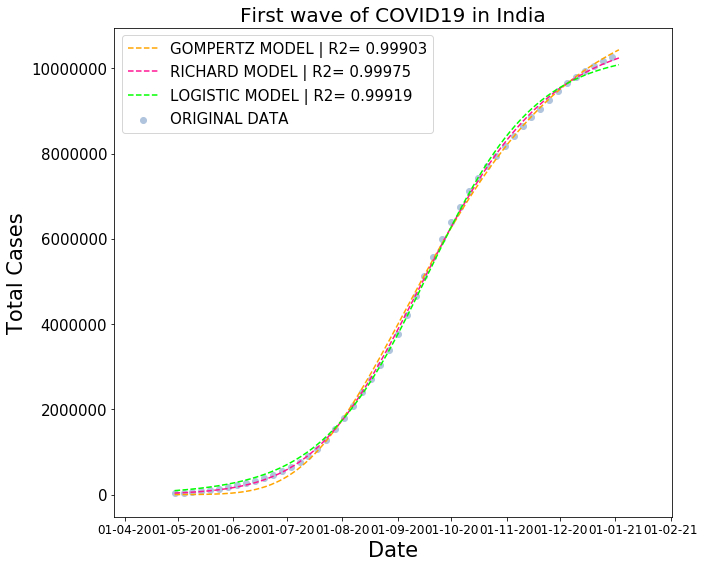

In [225]:
plt.figure(figsize=(10,9))
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.scatter(df['date'][90:340:5],df['total_cases'][90:340:5], c='lightsteelblue', label='ORIGINAL DATA')

plt.plot(df['date'][90:340], y_gompertz, c='orange', linestyle='dashed', label='GOMPERTZ MODEL | R2= {0:.5f}'.format(r2_score(y_gompertz,y)))

plt.plot(df['date'][90:340], y_richard, c='deeppink', linestyle='dashed', label='RICHARD MODEL | R2= {0:.5f}'.format(r2_score(y_richard,y)))

plt.plot(df['date'][90:340], y_logistic,c='lime', linestyle='dashed', label='LOGISTIC MODEL | R2= {0:.5f}'.format(r2_score(y_logistic,y)))


plt.xlabel('Date', fontsize=21)
plt.ylabel('Total Cases', fontsize=21)

plt.yticks(fontsize=15) 
plt.xticks(rotation=360,fontsize=12) 

plt.title('First wave of COVID19 in India',fontsize=20)
plt.legend(fontsize=15)
plt.show()